In [89]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# loading in the dataset
data = pd.read_csv("housing.csv")

In [91]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


^^^ ocean_proximity will need to be cleaned since it is text and cannot be used for machine learning modelling 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms feature has values missing so we will drop 'Not a number' values below

In [93]:
# this function will even out the data
data.dropna(inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [95]:
from sklearn.model_selection import train_test_split

# x is going to be the datafram without the target variable
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [96]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20528,-121.80,38.55,11.0,5121.0,899.0,2258.0,901.0,4.7168,INLAND,223200.0
5806,-118.26,34.14,29.0,3431.0,1222.0,4094.0,1205.0,2.2614,<1H OCEAN,248100.0
4374,-118.28,34.10,49.0,1767.0,467.0,1066.0,438.0,3.0958,<1H OCEAN,210900.0
6706,-118.14,34.14,17.0,3404.0,1011.0,1694.0,949.0,2.9511,<1H OCEAN,282300.0
20443,-118.85,34.27,50.0,187.0,33.0,130.0,35.0,3.3438,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
17253,-119.71,34.42,49.0,1560.0,436.0,1041.0,411.0,2.9250,<1H OCEAN,246900.0
17912,-121.98,37.36,35.0,1293.0,223.0,701.0,216.0,7.8543,<1H OCEAN,281900.0
2436,-119.60,36.58,28.0,1452.0,300.0,919.0,308.0,2.8287,INLAND,73100.0
12579,-121.41,38.52,25.0,3087.0,720.0,2529.0,708.0,1.8689,INLAND,66800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

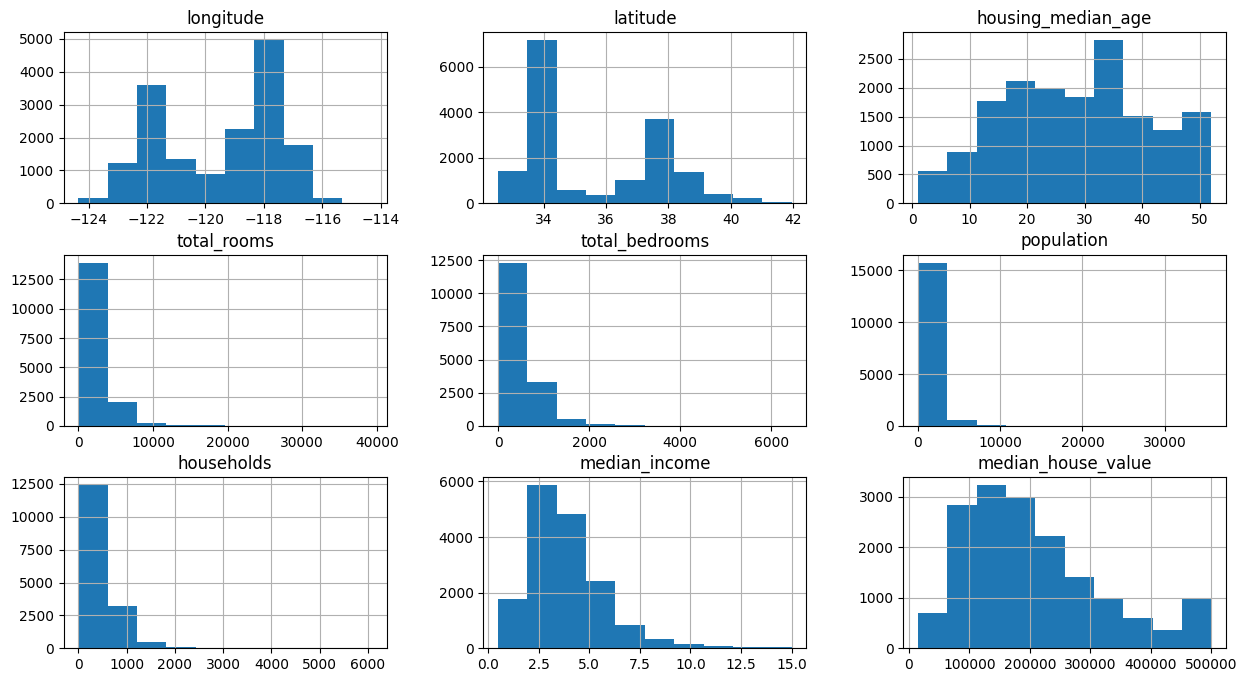

In [99]:
train_data.hist(figsize= (15,8))

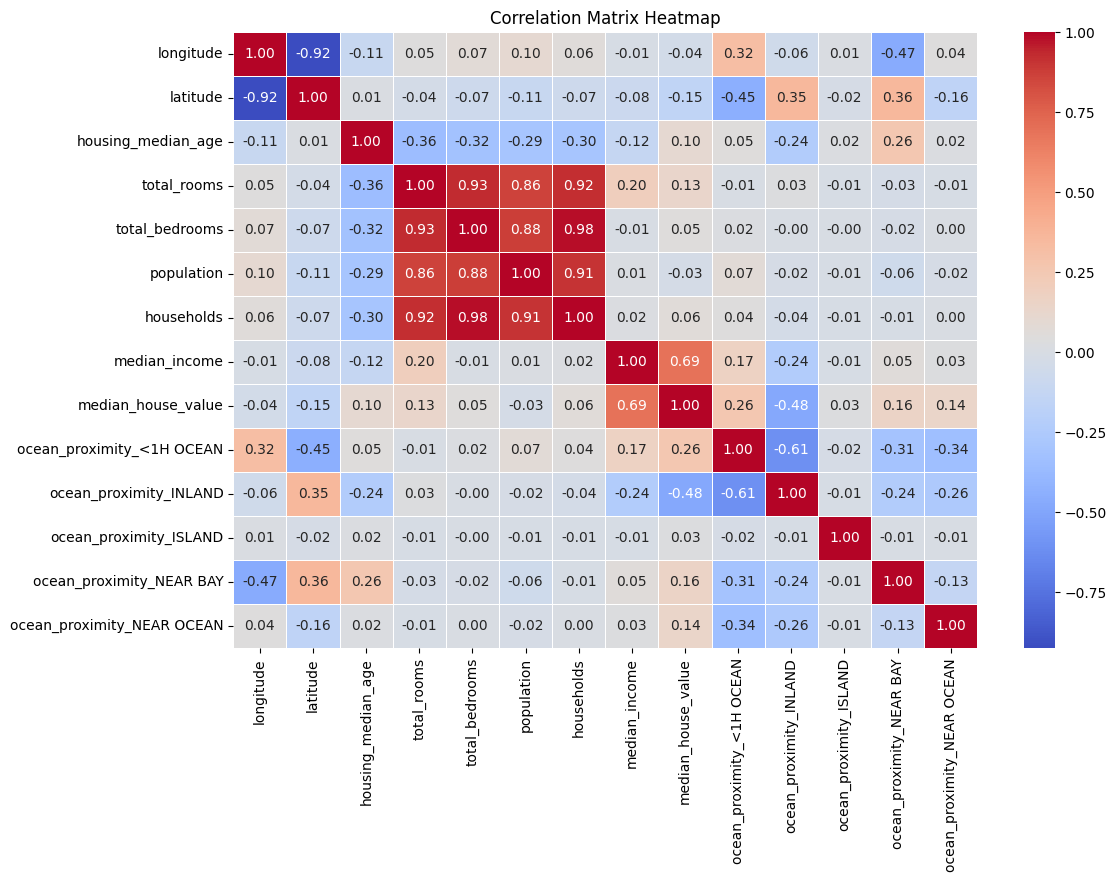

In [105]:
# One-hot encode categorical columns and calculate the correlation matrix
train_data_encoded = pd.get_dummies(train_data)
correlation_matrix = train_data_encoded.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [107]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

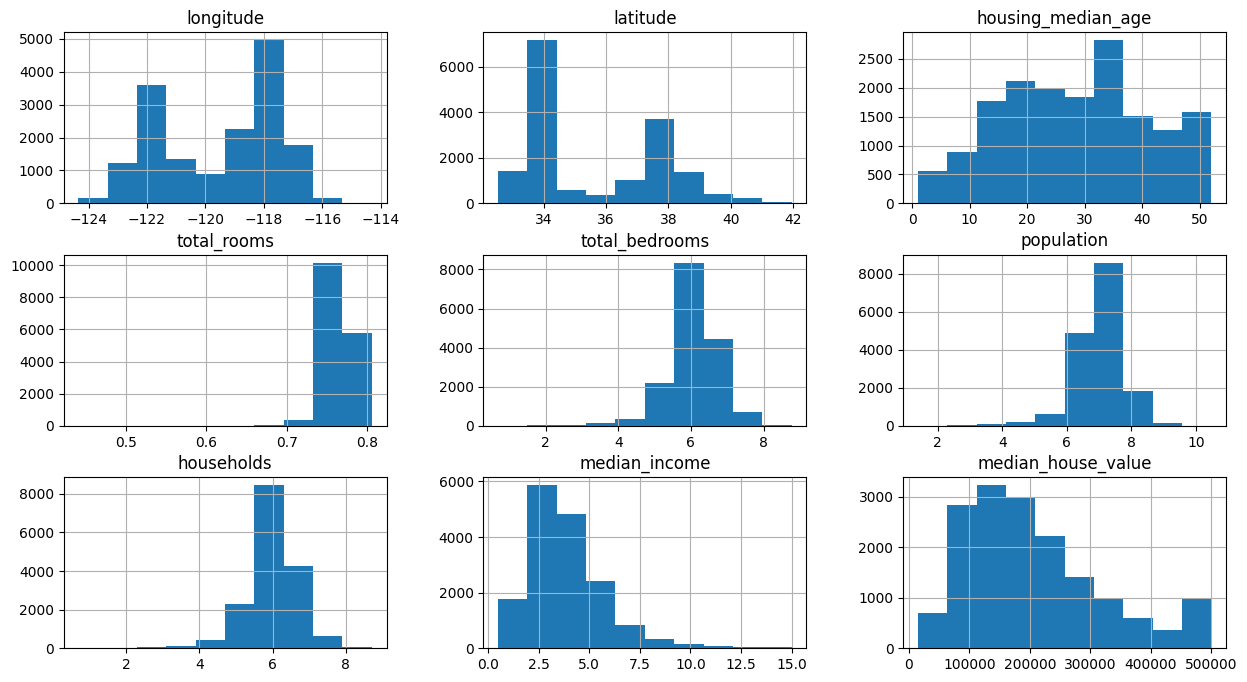

In [110]:
train_data.hist(figsize= (15,8))

Looks a lot more like a Gaussian bell curve in the histograms above

In [115]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [116]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20528,-121.80,38.55,11.0,0.779502,6.802395,7.722678,6.804615,4.7168,223200.0,False,True,False,False,False
5806,-118.26,34.14,29.0,0.773404,7.109062,8.317522,7.095064,2.2614,248100.0,True,False,False,False,False
4374,-118.28,34.10,49.0,0.762395,6.148468,6.972606,6.084499,3.0958,210900.0,True,False,False,False,False
6706,-118.14,34.14,17.0,0.773280,6.919684,7.435438,6.856462,2.9511,282300.0,True,False,False,False,False
20443,-118.85,34.27,50.0,0.713156,3.526361,4.875197,3.583519,3.3438,500001.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17253,-119.71,34.42,49.0,0.760187,6.079933,6.948897,6.021023,2.9250,246900.0,True,False,False,False,False
17912,-121.98,37.36,35.0,0.756767,5.411646,6.553933,5.379897,7.8543,281900.0,True,False,False,False,False
2436,-119.60,36.58,28.0,0.758893,5.707110,6.824374,5.733341,2.8287,73100.0,False,True,False,False,False
12579,-121.41,38.52,25.0,0.771730,6.580639,7.835975,6.563856,1.8689,66800.0,False,True,False,False,False


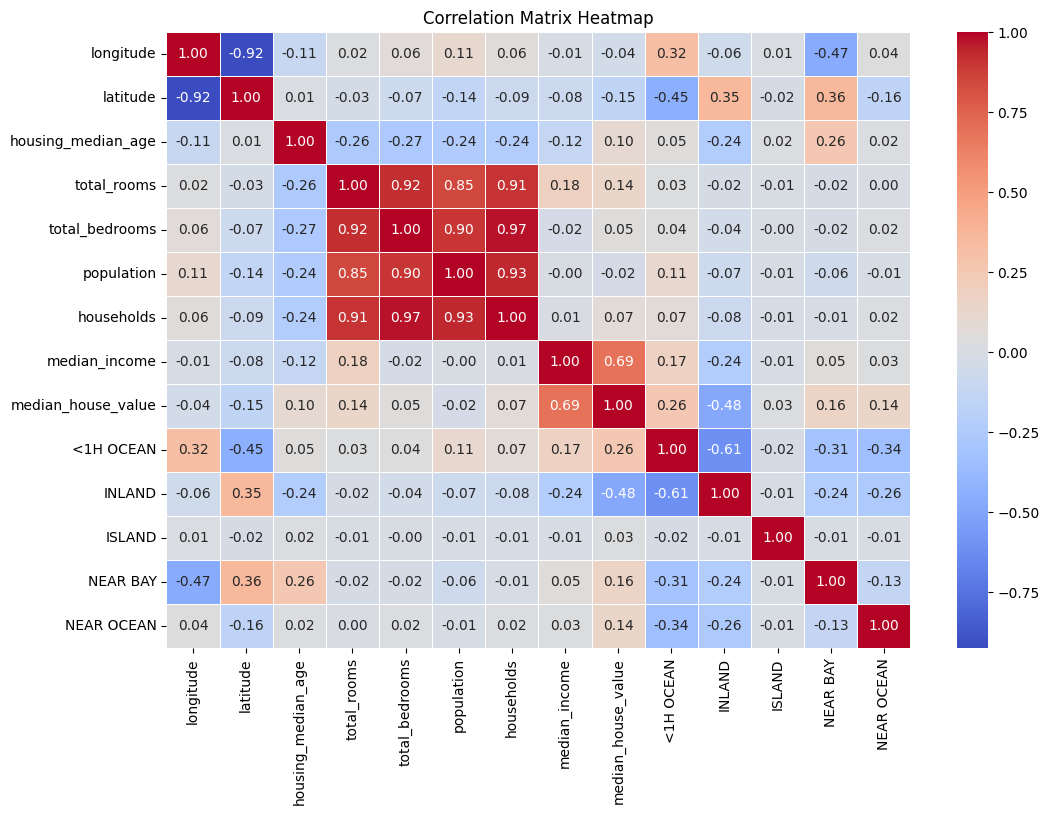

In [117]:
# One-hot encode categorical columns and calculate the correlation matrix
train_data_encoded = pd.get_dummies(train_data)
correlation_matrix = train_data_encoded.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

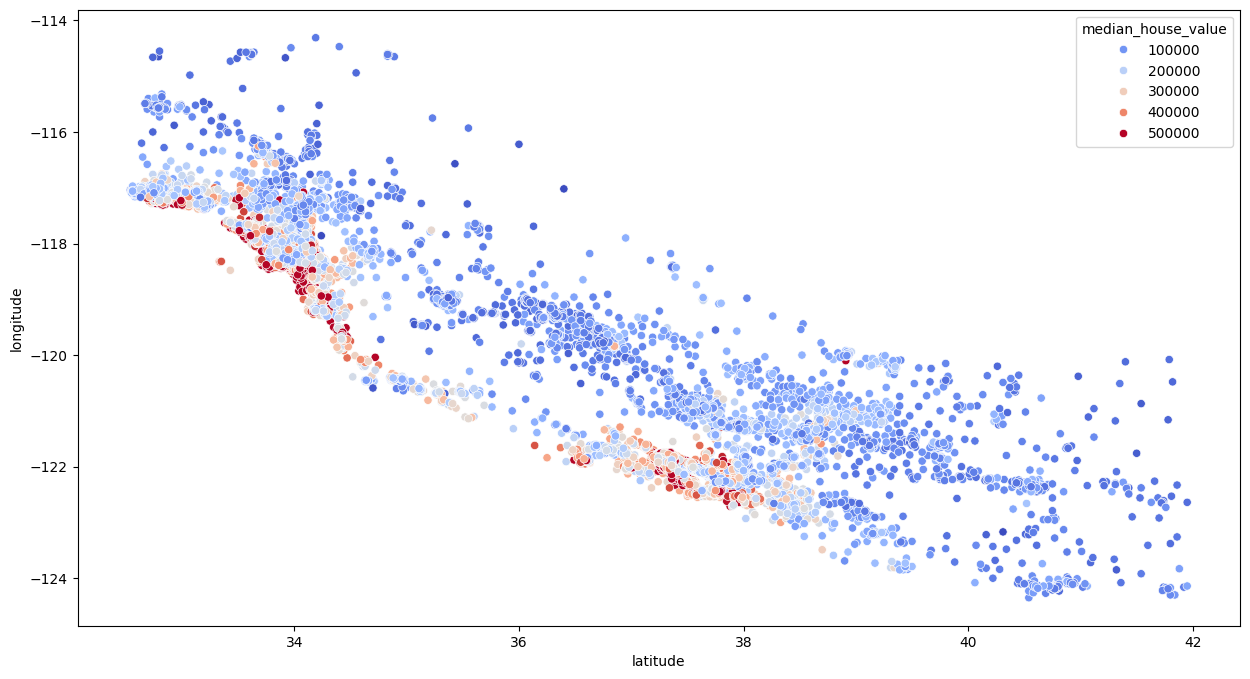

In [120]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")